In [1]:
!pip install ucimlrepo


In [3]:
from ucimlrepo import fetch_ucirepo 
 
car_evaluation = fetch_ucirepo(id=19) 
 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 


     buying  maint  doors persons lug_boot safety
0     vhigh  vhigh      2       2    small    low
1     vhigh  vhigh      2       2    small    med
2     vhigh  vhigh      2       2    small   high
3     vhigh  vhigh      2       2      med    low
4     vhigh  vhigh      2       2      med    med
...     ...    ...    ...     ...      ...    ...
1723    low    low  5more    more      med    med
1724    low    low  5more    more      med   high
1725    low    low  5more    more      big    low
1726    low    low  5more    more      big    med
1727    low    low  5more    more      big   high

[1728 rows x 6 columns]


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
y_encoded = le.fit_transform(y.values.ravel())


In [15]:
# sozdavanje na testiracko i terinarko mnozestvo kade testirackoto e 20% a trenirackoto e 80% od podatocite
from sklearn.tree import DecisionTreeClassifier  
# from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # for classification accuracy




X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [19]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print(f"accuracy bez nikakvi promeni na parametri e: {acc}")

accuracy bez nikakvi promeni na parametri e: 0.9682080924855492


In [41]:
dt2=DecisionTreeClassifier(random_state=0,criterion="entropy")
dt2.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)
acc2= accuracy_score(y_test, y_pred2)
print(f"accuracy so criterion entropy e: {acc2}")

accuracy so criterion entropy e: 0.9682080924855492


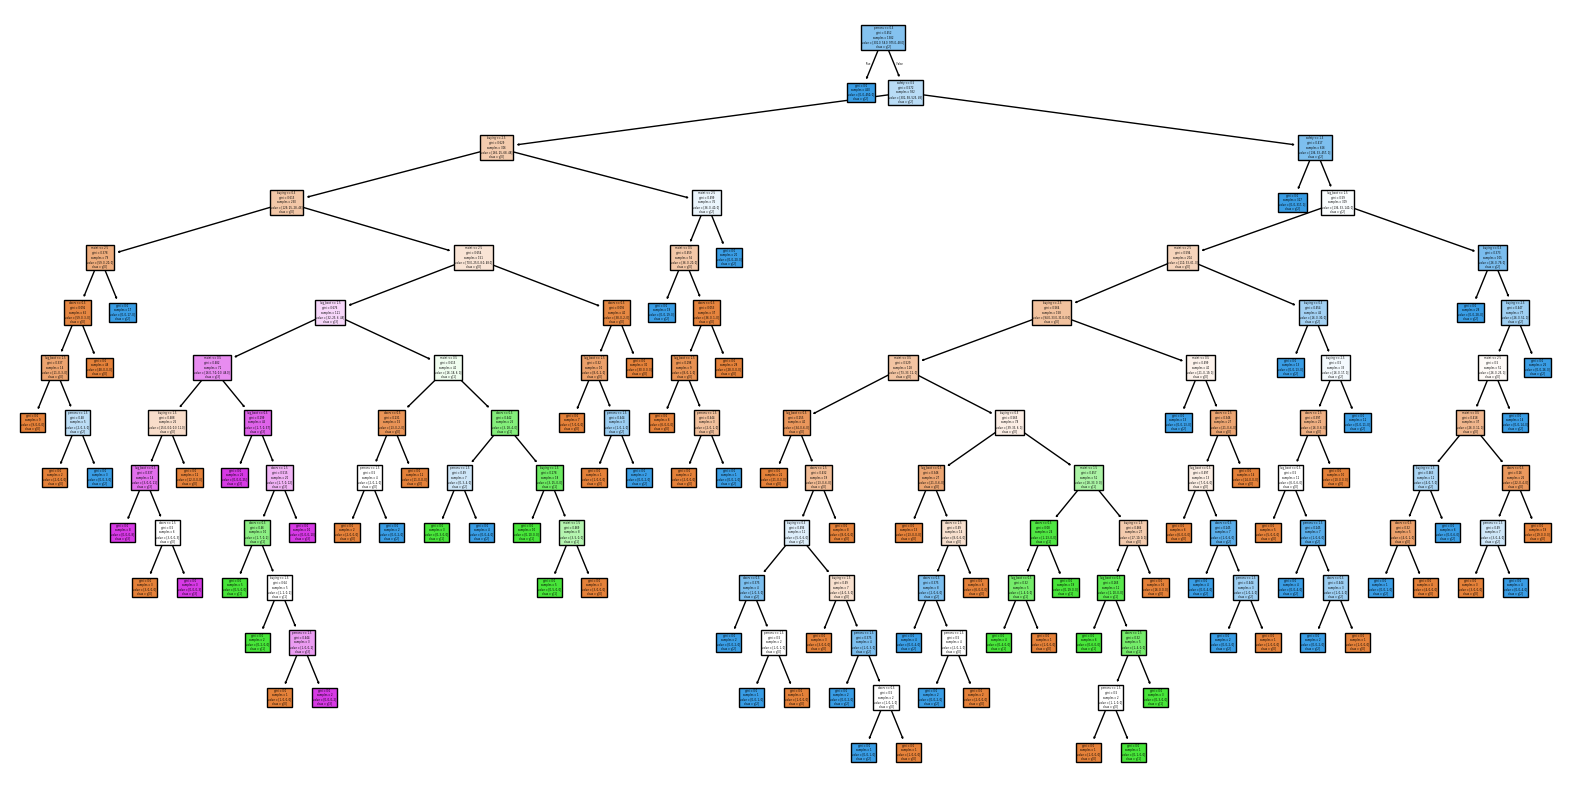

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=True)
plt.show()


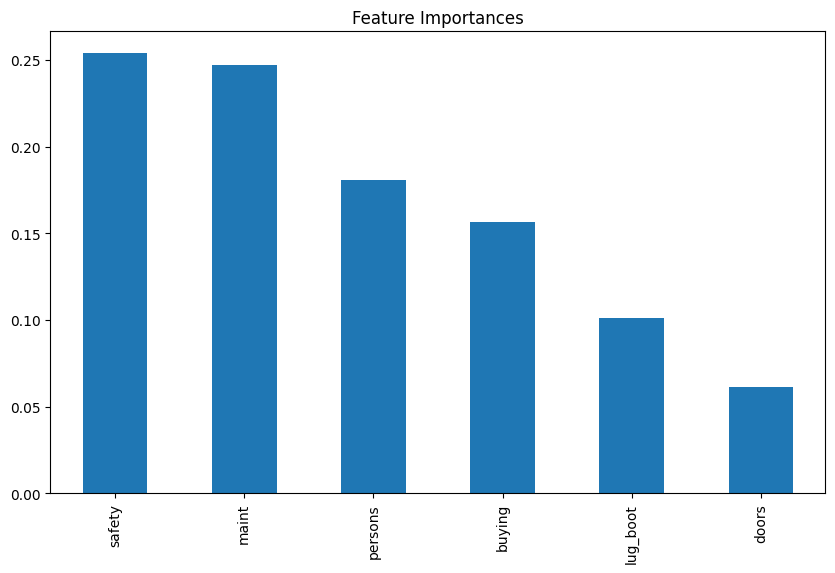

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

importances = dt.feature_importances_
features = X.columns

# Create a DataFrame for easier plotting
feat_imp = pd.Series(importances, index=features)

# Sort descending
feat_imp = feat_imp.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importances")
plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the model
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit on training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {acc}")


Random Forest accuracy: 0.9739884393063584


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf2 = RandomForestClassifier(n_estimators=50, random_state=0,max_features=4)


rf2.fit(X_train, y_train)


y_pred2 = rf2.predict(X_test)

acc2 = accuracy_score(y_test, y_pred2)
print(f"Random Forest accuracy: {acc2}")


Random Forest accuracy: 0.9624277456647399


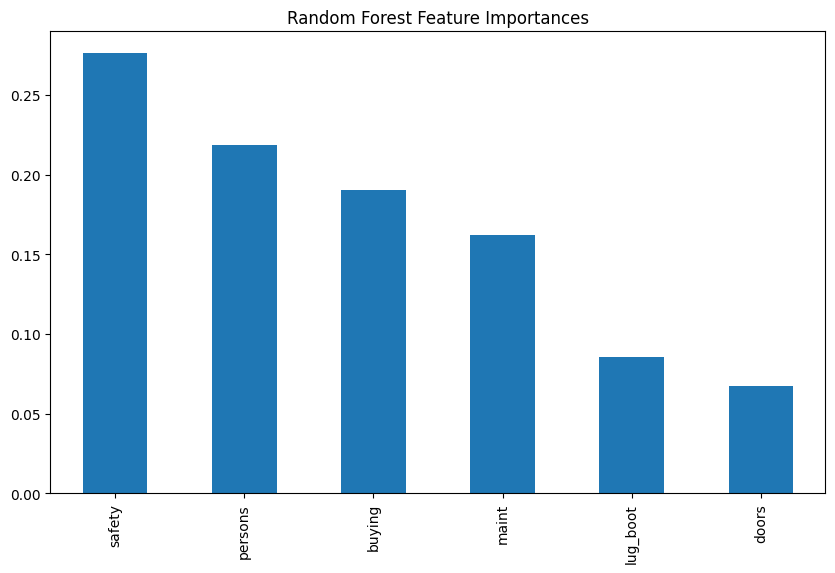

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.show()


In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assume X_train, y_train, X_test, y_test are ready (preprocessed and encoded)

# Create the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(150,), random_state=0,learning_rate_init=0.01,learning_rate="adaptive")

# Train the model
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the neural network: {accuracy:.2f}")


Accuracy of the neural network: 0.99


In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assume X_train, y_train, X_test, y_test are ready (preprocessed and encoded)

# Create the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50,), random_state=0,learning_rate_init=0.01,learning_rate="adaptive")

# Train the model
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the neural network: {accuracy:.2f}")


Accuracy of the neural network: 0.97


C:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assume X_train, y_train, X_test, y_test are ready (preprocessed and encoded)

# Create the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50,), random_state=0,learning_rate_init=0.1,learning_rate="adaptive")

# Train the model
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the neural network: {accuracy:.2f}")


Accuracy of the neural network: 0.75
